In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

from sklearn.metrics.pairwise import cosine_similarity, kernel_metrics, cosine_distances

# TODO: Add syege path to your python to run this example
from syege import generate_synthetic_linear_classifier
from syege import get_feature_importance_explanation
from evaluation import feature_importance_similarity
from numpy import linalg

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm, spearmanr
from sklearn.datasets import load_breast_cancer, load_iris

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, RobustScaler, MinMaxScaler
#from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import pairwise_distances, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

#import lime
#import lime.lime_tabular
import shap
import os
from sklearn.base import TransformerMixin

In [68]:
def nbayes_local_explaination(instance, model, explained_class):
    feature_importance = []
    epsilon = 1e-3

    for i in range(instance.shape[0]):
        explained_class_prob = norm.pdf(instance[i], model.theta_[ explained_class][i], 
                                        np.sqrt(model.sigma_[explained_class][i]))
        unexplained_class_prob = norm.pdf(instance[i], model.theta_[1 - explained_class][i], 
                                          np.sqrt(model.sigma_[1 - explained_class][i])) + epsilon
        feature_importance.append(np.log(epsilon + (explained_class_prob / unexplained_class_prob)))
    
    return np.array(feature_importance)


def lreg_local_explaination(instance, model, predicted_class):
    #return np.multiply(model.coef_, instance).flatten()
    return np.multiply(model.coef_, instance).flatten()[0]

In [4]:
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        if type(X) == scipy.sparse.csr.csr_matrix:    
            return X.todense()
        else: 
            return X

In [67]:
np.multiply(lreg['lreg'].coef_, X[i])[0]

array([-5.21879424,  0.69741169])

In [5]:
def measure_similarity(gt_1, gt_2):
    sr_abs = spearmanr(np.abs(gt_1), np.abs(gt_2), axis=1).correlation

    cd = cosine_similarity(gt_1.reshape(1, -1).astype(np.float64), 
                          gt_2.reshape(1, -1).astype(np.float64))[0][0]
    
    val_norm = linalg.norm(gt_1 - gt_2)
    sim_norm = 1 / (val_norm + 1)
    
    return sr_abs, cd, sim_norm

In [6]:
slc = generate_synthetic_linear_classifier(expr='2*x0 - x1', n_features=2, n_all_features=2,
                                           random_state=0, p_binary=0.8,
                                           p_parenthesis=0.3)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(slc['X'])

gbayes = Pipeline([
    ('to_dense', DenseTransformer()), 
    ("gbayes", GaussianNB())
])
                
lreg = Pipeline([
    ('to_dense', DenseTransformer()), 
    ("lreg", LogisticRegression(random_state=0, max_iter=10000))
])

lreg.fit(X, slc['Y'])
gbayes.fit(X, slc['Y'])

y_pred_lreg = lreg.predict(X)
y_pred_gbayes = gbayes.predict(X)

Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.


In [14]:
ge = lreg['lreg'].coef_[0]

In [15]:
lreg.score(X, slc['Y']), gbayes.score(X, slc['Y'])

Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.


(0.997, 0.949)

In [16]:
n_features = 2
gt_vals = []
lreg_prox = []
lreg_vals = [] 
gbayes_vals = []

for i in range(X.shape[0]):
    gt_val = get_feature_importance_explanation(X[i], slc, n_features, get_values=True)
    gt_vals.append(gt_val)
    gt_lreg = lreg_local_explaination(X[i], lreg['lreg'], 1)
    lreg_vals.append(gt_lreg)
    gt_nbayes =  nbayes_local_explaination(X[i], gbayes['gbayes'], 1)
    gbayes_vals.append(gt_nbayes)
    lreg_prox.append(measure_similarity(gt_val, gt_lreg))
    #nbayes_prox.append(measure_similarity(gt_val, gt_nbayes))

Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
Attribute `sigma_` was deprecate

In [75]:
pred_class = lreg.predict(X[i].reshape(1, -1))
pred_class

Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.


array([0])

In [76]:
robustness_vals = []
for i in range(max_instance):    
    pred_class = lreg.predict(X[i].reshape(1, -1))[0]
    base_pred = lreg.predict_proba(X[i].reshape(1, -1))[:, pred_class][0]
    r_val = np.zeros(X.shape[1])
    for j in range(X.shape[1]):
        copy_instance = X[i].copy()
        copy_instance[j] = X[j].mean()
        new_pred = lreg.predict_proba(copy_instance.reshape(1, -1))[:, pred_class][0]
        r_val[j] = np.abs(new_pred - base_pred)
    robustness_vals.append(r_val)

Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
Please use `csr_matrix` from the `sci

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


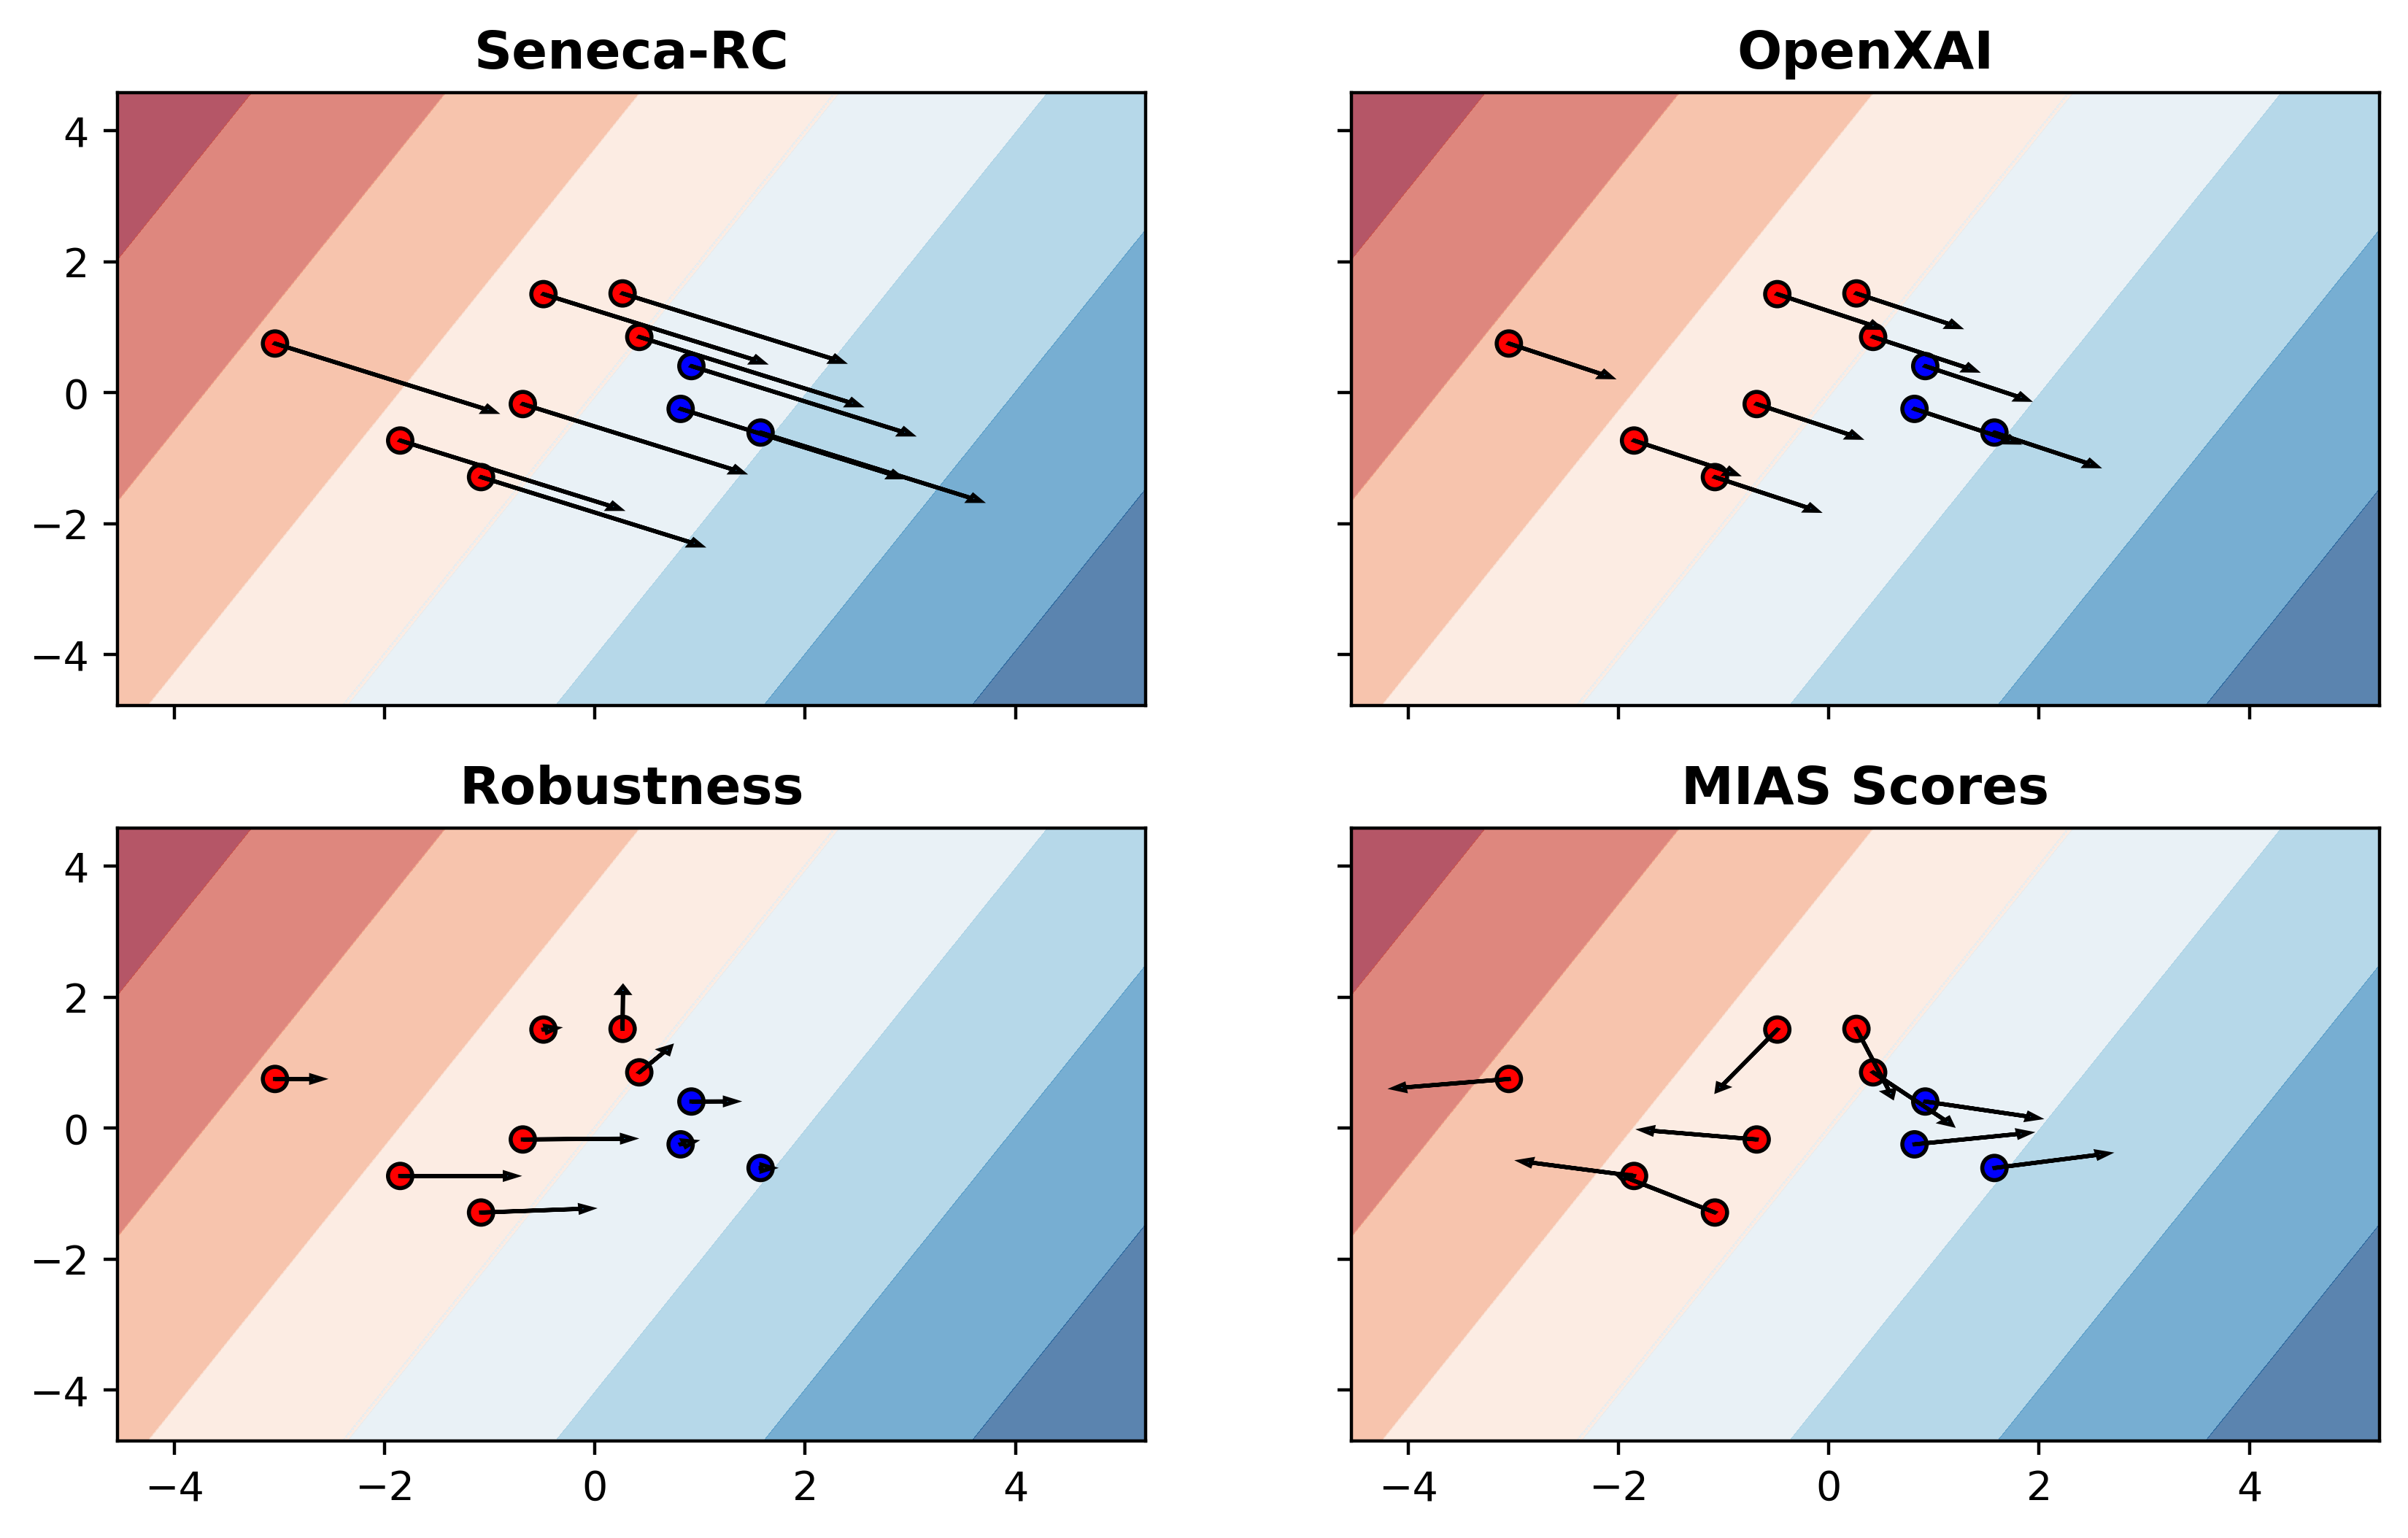

In [78]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(2, 2, figsize=(10, 6), dpi=400, sharex=True, sharey=True)
ax = ax.ravel()
max_instance = 10
h = 0.02
offset = 1.5
x_min, x_max = X[:, 0].min() - offset, X[:, 0].max() + offset
y_min, y_max = X[:, 1].min() - offset, X[:, 1].max() +offset
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

#ax.scatter(X_train[:, 0], X_train[:, 1], c=Y, cmap=cm_bright, edgecolors="k")
Z = slc['predict_proba'](np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

ax[0].contourf(xx, yy, Z, cmap=cm, alpha=0.7)
ax[0].scatter(X[:max_instance, 0], X[:max_instance, 1], c=y_pred_lreg[0: max_instance], cmap=cm_bright, edgecolors="k", alpha=1)
#ax.set_xlim(xx.min(), xx.max())
#ax.set_ylim(yy.min(), yy.max())

for i in range(max_instance):
    ax[0].arrow(X[i, 0], X[i, 1], gt_vals[i][0], gt_vals[i][1], head_width=0.1, head_length=0.1)
    #ax[0].arrow(X[i, 0], X[i, 1], lreg_vals[i][0], lreg_vals[i][1])
#Z = lreg.decision_function(np.c_[xx.ravel(), yy.ravel()])
ax[0].set_title('Seneca-RC', fontweight='bold', fontsize=13)

ax[1].contourf(xx, yy, Z, cmap=cm, alpha=0.7)
ax[1].scatter(X[:max_instance, 0], X[:max_instance, 1], c=y_pred_lreg[0:max_instance], cmap=cm_bright, edgecolors="k", alpha=1)
for i in range(max_instance):
    point = ge
    norm1 = point / np.linalg.norm(point)
    ax[1].arrow(X[i, 0], X[i, 1], norm1[0], norm1[1], head_width=0.1, head_length=0.1)
ax[1].set_title('OpenXAI', fontweight='bold', fontsize=13)


ax[2].contourf(xx, yy, Z, cmap=cm, alpha=0.7)
ax[2].scatter(X[:max_instance, 0], X[:max_instance, 1], c=y_pred_lreg[0:max_instance], cmap=cm_bright, edgecolors="k", alpha=1)
for i in range(max_instance):
    r = robustness_vals[i]
    #r = r / np.linalg.norm(r)
    ax[2].arrow(X[i, 0], X[i, 1], r[0], r[1], head_width=0.1, head_length=0.1)
ax[2].set_title('Robustness', fontweight='bold', fontsize=13)

ax[3].contourf(xx, yy, Z, cmap=cm, alpha=0.7)
ax[3].scatter(X[:max_instance, 0], X[:max_instance, 1], c=y_pred_lreg[0:max_instance], cmap=cm_bright, edgecolors="k", alpha=1)
for i in range(max_instance):
    point = lreg_vals[i]
    norm1 = point / np.linalg.norm(point)
    ax[3].arrow(X[i, 0], X[i, 1], norm1[0], norm1[1], head_width=0.1, head_length=0.1)
ax[3].set_title('MIAS Scores', fontweight='bold', fontsize=13)


plt.savefig('./synthetic_example_latest_new_2.eps')
#plt.show()